<a href="https://www.kaggle.com/code/abmsayem/trends-of-global-energy-consumption?scriptVersionId=126462230" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

The last few decades have seen significant changes in global energy consumption patterns, with a growing emphasis on access to electricity and cleaner sources of energy for cooking. The number of people with access to electricity has been steadily increasing, along with a rise in per capita electricity consumption. At the same time, there has been a concerted effort to reduce the use of traditional, polluting fuels for cooking, with a focus on clean fuels such. These trends have been driven by a range of factors, including population growth, economic development, and environmental concerns.

In this notebook, I will explore the current state of global energy consumption, with a particular focus on the number of people with access to electricity, the number with clean fuels for cooking, per capita electricity consumption, and primary energy consumption per capita. By the end of this notebook, you will have a better understanding of the key trends in global energy consumption, and the ways in which they are likely to shape our future.

# Data Cleaning and Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML

%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
pd.set_option('display.max_rows', None)

/kaggle/input/access-to-energy/access-to-clean-fuels-and-technologies-for-cooking.csv
/kaggle/input/access-to-energy/share-of-rural-population-with-electricity-access-vs-share-of-total-population-with-electricity-access.csv
/kaggle/input/access-to-energy/access-to-clean-fuels-for-cooking-vs-gdp-per-capita.csv
/kaggle/input/access-to-energy/number-without-electricity-by-region.csv
/kaggle/input/access-to-energy/number-without-clean-cooking-fuel.csv
/kaggle/input/access-to-energy/share-of-the-population-with-access-to-electricity.csv
/kaggle/input/access-to-energy/people-without-electricity-country.csv
/kaggle/input/access-to-energy/number-with-without-clean-cooking-fuels.csv
/kaggle/input/access-to-energy/per-capita-energy-use.csv
/kaggle/input/access-to-energy/per-capita-electricity-generation.csv
/kaggle/input/access-to-energy/owid-energy-data.csv
/kaggle/input/access-to-energy/access-to-electricity-vs-gdp-per-capita.csv
/kaggle/input/access-to-energy/number-of-people-with-and-without

In [2]:
df1 = pd.read_csv('/kaggle/input/access-to-energy/number-of-people-with-and-without-electricity-access.csv')
df2 = pd.read_csv('/kaggle/input/access-to-energy/number-with-without-clean-cooking-fuels.csv')
df3 = pd.read_csv('/kaggle/input/access-to-energy/per-capita-electricity-generation.csv')
df4 = pd.read_csv('/kaggle/input/access-to-energy/per-capita-energy-use.csv')

In [3]:
npae = df1[df1.Year == 2019].drop(index=[6495,2668,3533,3963,2648,1575,3580,6344,1595,3250,1635,1615,5567,5594,4520,2539,4880,2733,1879,3278,2711,3306,3334,3384,5732,5708,5756,2053,1899,1949,4903,3903,1919,185,3943,2690,3923,4399,2509,1849,34,3553,61,1069]).sort_values('Number of people with access to electricity', ascending=False).head(20).reset_index().drop(['index','Code','Number of people without access to electricity'], axis = 1)

npwae = df1[df1.Year == 2019].drop(index=[6495,2668,3533,3963,2648,1575,3580,6344,1595,3250,1635,1615,5567,5594,4520,2539,4880,2733,1879,3278,2711,3306,3334,3384,5732,5708,5756,2053,1899,1949,4903,3903,1919,185,3943,2690,3923,4399,2509,1849,34,3553,61,1069]).sort_values('Number of people without access to electricity', ascending=False).head(20).reset_index().drop(['index','Code','Number of people with access to electricity'], axis = 1)

npaeRE = df1.loc[[1595,5567,3278,5708,1949,3903,185,4399,34,61,1069]].sort_values('Entity').reset_index().drop(['index','Code','Number of people without access to electricity'], axis = 1)

npwaeRE = df1.loc[[1595,5567,3278,5708,1949,3903,185,4399,34,61,1069]].sort_values('Entity').reset_index().drop(['index','Code','Number of people with access to electricity'], axis = 1)

npaeWD = df1[df1.Entity == 'World'].reset_index().drop(['index','Code'], axis = 1)

npaerac = df1.drop(index=[6495,2668,3533,3963,2648,1575,3580,6344,1595,3250,1635,1615,5567,5594,4520,2539,4880,2733,1879,3278,2711,3306,3334,3384,5732,5708,5756,2053,1899,1949,4903,3903,1919,185,3943,2690,3923,4399,2509,1849,34,3553,61,1069]).sort_values('Entity', ascending=True).reset_index().drop(['index','Code','Number of people without access to electricity'], axis = 1)

sort = npaerac.sort_values('Year')

newdf_tr = sort.pivot_table(values = 'Number of people with access to electricity',index = ['Entity'], columns = 'Year')

newdf = newdf_tr.drop(['Africa Eastern and Southern','Africa Western and Central','Arab World','Caribbean Small States','Central Europe and the Baltics','Early-demographic dividend','East Asia & Pacific','East Asia & Pacific (IDA & IBRD)','East Asia & Pacific (excluding high income)','Euro area','Europe & Central Asia','Europe & Central Asia (IDA & IBRD)','Europe & Central Asia (excluding high income)','European Union','Fragile and conflict affected situations','Heavily indebted poor countries (HIPC)','High income','IBRD only','IDA & IBRD total','IDA only','IDA total','Late-demographic dividend','Latin America & Caribbean','Latin America & Caribbean (IDA & IBRD)','Latin America & Caribbean (excluding high income)','Least developed countries: UN classification','Low & middle income','Low income','Lower middle income','Middle East & North Africa','Middle East & North Africa (IDA & IBRD)','Middle East & North Africa (excluding high income)','Middle income','North America','OECD members','Other small states','Pacific island small states','Post-demographic dividend','Pre-demographic dividend','Small states','South Asia','South Asia (IDA & IBRD)','Sub-Saharan Africa','Sub-Saharan Africa (IDA & IBRD)','Sub-Saharan Africa (excluding high income)','Upper middle income','World'])

newdf.fillna(0, inplace=True)
newdf.sort_values(list(newdf_tr.columns),inplace=True)
newdf = newdf.sort_index()

In [4]:
ncfc = df2[df2.Year == 2016].drop(index=[28,45,138,595,629,930,947,964,981,1116,1133,1150,1167,1184,1235,1465,1482,1533,1550,1567,1584,1601,1896,1913,1930,1947,1981,2042,2059,2076,2287,2304,2321,2338,2667,2701,2718,2888,2905,3223,3306,3381,3398,3415,3767,3869]).sort_values('number_with_clean_fuels_cooking', ascending=False).head(20).reset_index().drop(['index', 'Code', 'number_without_clean_fuels_cooking'], axis=1)

nwcfc = df2[df2.Year == 2016].drop(index=[28,45,138,595,629,930,947,964,981,1116,1133,1150,1167,1184,1235,1465,1482,1533,1550,1567,1584,1601,1896,1913,1930,1947,1981,2042,2059,2076,2287,2304,2321,2338,2667,2701,2718,2888,2905,3223,3289,3306,3381,3398,3415,3767,3869]).sort_values('number_without_clean_fuels_cooking', ascending=False).head(20).reset_index().drop(['index', 'Code', 'number_with_clean_fuels_cooking'], axis=1)

ncfcRE = df2.loc[[28,45,138,595,629,947,1116,1184,1913,2287,2718,3289,3381]].sort_values('Entity').reset_index().drop(['index','Code','number_without_clean_fuels_cooking'], axis = 1)

nwcfcRE = df2.loc[[28,45,138,595,629,947,1116,1184,1913,2287,2718,3289,3381]].sort_values('Entity').reset_index().drop(['index','Code','number_with_clean_fuels_cooking'], axis = 1)

nwcfcWD = df2[df2.Entity == 'World'].reset_index().drop(['index','Code'], axis = 1)

ncfcrac = df2.drop(index=[28,45,138,595,629,930,947,964,981,1116,1133,1150,1167,1184,1235,1465,1482,1533,1550,1567,1584,1601,1896,1913,1930,1947,1981,2042,2059,2076,2287,2304,2321,2338,2667,2701,2718,2888,2905,3223,3306,3381,3398,3415,3767,3869]).sort_values('Year', ascending=True).reset_index().drop(['index', 'Code', 'number_without_clean_fuels_cooking'], axis=1)

andf_tr = ncfcrac.pivot_table(values = 'number_with_clean_fuels_cooking',index = ['Entity'], columns = 'Year')

andf = andf_tr.drop(['Africa Eastern and Southern','Africa Western and Central','Arab World','Caribbean Small States','Central Europe and the Baltics','Early-demographic dividend','East Asia & Pacific','East Asia & Pacific (IDA & IBRD)','East Asia & Pacific (excluding high income)','Euro area','Europe & Central Asia','Europe & Central Asia (IDA & IBRD)','Europe & Central Asia (excluding high income)','European Union','Fragile and conflict affected situations','Heavily indebted poor countries (HIPC)','High income','IBRD only','IDA blend','IDA & IBRD total','IDA only','IDA total','Late-demographic dividend','Latin America & Caribbean','Latin America & Caribbean (IDA & IBRD)','Latin America & Caribbean (excluding high income)','Least developed countries: UN classification','Low & middle income','Low income','Lower middle income','Middle East & North Africa','Middle East & North Africa (IDA & IBRD)','Middle East & North Africa (excluding high income)','Middle income','North America','OECD members','Other small states','Pacific island small states','Post-demographic dividend','Pre-demographic dividend','Small states','South Asia','South Asia (IDA & IBRD)','Sub-Saharan Africa','Sub-Saharan Africa (IDA & IBRD)','Sub-Saharan Africa (excluding high income)','Upper middle income','World'])

andf.fillna(0, inplace=True)
andf.sort_values(list(andf_tr.columns),inplace=True)
andf = andf.sort_index()

In [5]:
pce = df3[df3.Year == 2021].sort_values('Per capita electricity (kWh)', ascending=False).head(20).reset_index().drop(['index','Code'], axis=1)

pceRE = df3[df3.Year == 2021].loc[[58,310,1823,4123,4251,5256]].reset_index().drop(['index','Code'], axis=1)

pceWD = df3[df3.Entity == 'World'].reset_index().drop(['index','Code'], axis = 1)

pcerac = df3.sort_values(['Entity', 'Year'], ascending=True).reset_index().drop(['index','Code'], axis=1)

pcedf_tr = pcerac.pivot_table(values = 'Per capita electricity (kWh)',index = ['Entity'], columns = 'Year')

pcedf = pcedf_tr.drop(['Africa','Asia','Europe','European Union (27)','High-income countries','Low-income countries','Lower-middle-income countries','North America','Oceania','South America','Upper-middle-income countries','World',])

pcedf.fillna(0, inplace=True)
pcedf.sort_values(list(pcedf_tr.columns),inplace=True)
pcedf = pcedf.sort_index()

In [6]:
pecpc = df4[df4.Year == 2019].sort_values('Primary energy consumption per capita (kWh/person)', ascending=False).head(20).reset_index().drop(['index','Code'], axis=1)

pecpcRE = df4[df4.Year == 2019].loc[[94,487,2923,6636,6862,8443]].reset_index().drop(['index','Code'], axis=1)

pecpcWD = df4[df4.Entity == 'World'].reset_index().drop(['index','Code'], axis = 1)

pecpcrac = df4.sort_values(['Entity','Year'], ascending=True).reset_index().drop(['index','Code'], axis=1)

pecpcdf_tr = pecpcrac.pivot_table(values = 'Primary energy consumption per capita (kWh/person)',index = ['Entity'], columns = 'Year')

pecpcdf = pecpcdf_tr.drop(['Africa','Asia','Europe','European Union (27)','High-income countries','Low-income countries','Lower-middle-income countries','North America','Oceania','South America','Upper-middle-income countries','World',])

pecpcdf.fillna(0, inplace=True)
pecpcdf.sort_values(list(pecpcdf_tr.columns),inplace=True)
pecpcdf = pcedf.sort_index()

# Data Visualizations

In [7]:
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/13150962"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

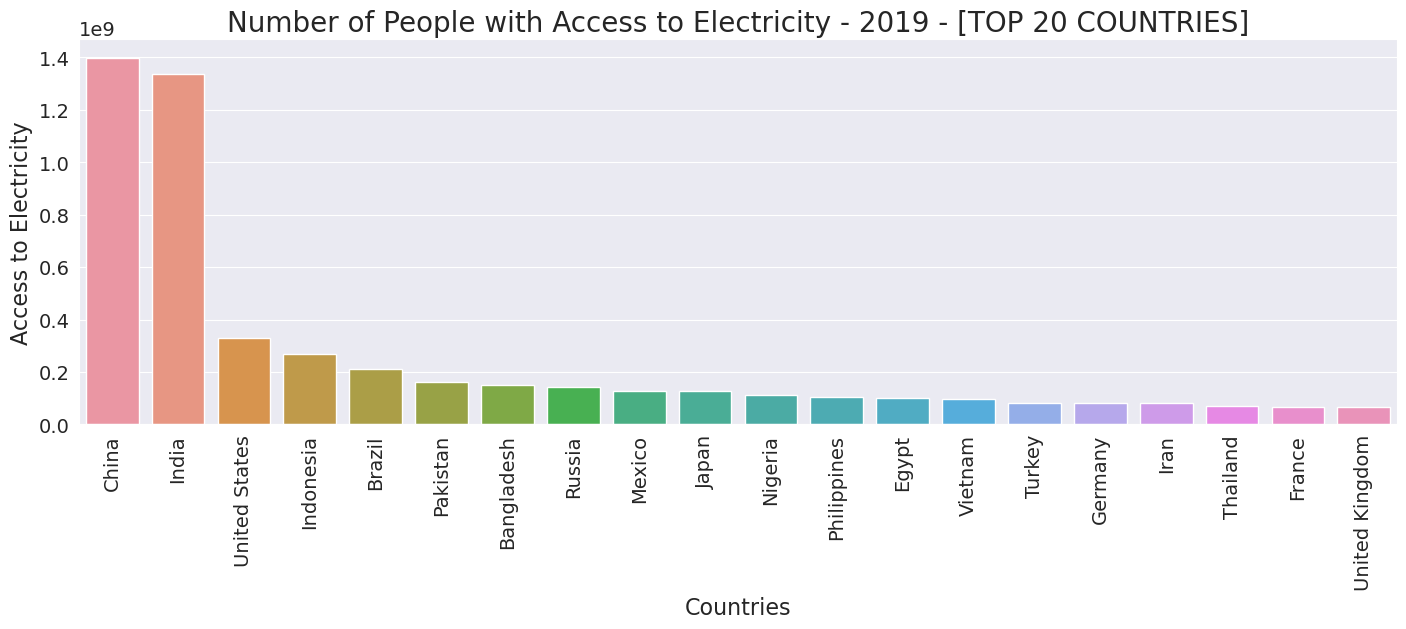

In [8]:
sns.barplot(x='Entity', y='Number of people with access to electricity', data=npae)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Access to Electricity', fontsize=16)
plt.xticks(rotation=90)
plt.title('Number of People with Access to Electricity - 2019 - [TOP 20 COUNTRIES]', fontsize=20)

plt.show();

In [9]:
npae

,Entity,Year,Number of people with access to electricity
0,China,2019,1.397715e+09
1,India,2019,1.336565e+09
2,United States,2019,3.283300e+08
3,Indonesia,2019,2.675134e+08
4,Brazil,2019,2.106274e+08
5,Pakistan,2019,1.600729e+08
6,Bangladesh,2019,1.503286e+08
7,Russia,2019,1.444063e+08
8,Mexico,2019,1.275755e+08
9,Japan,2019,1.262649e+08


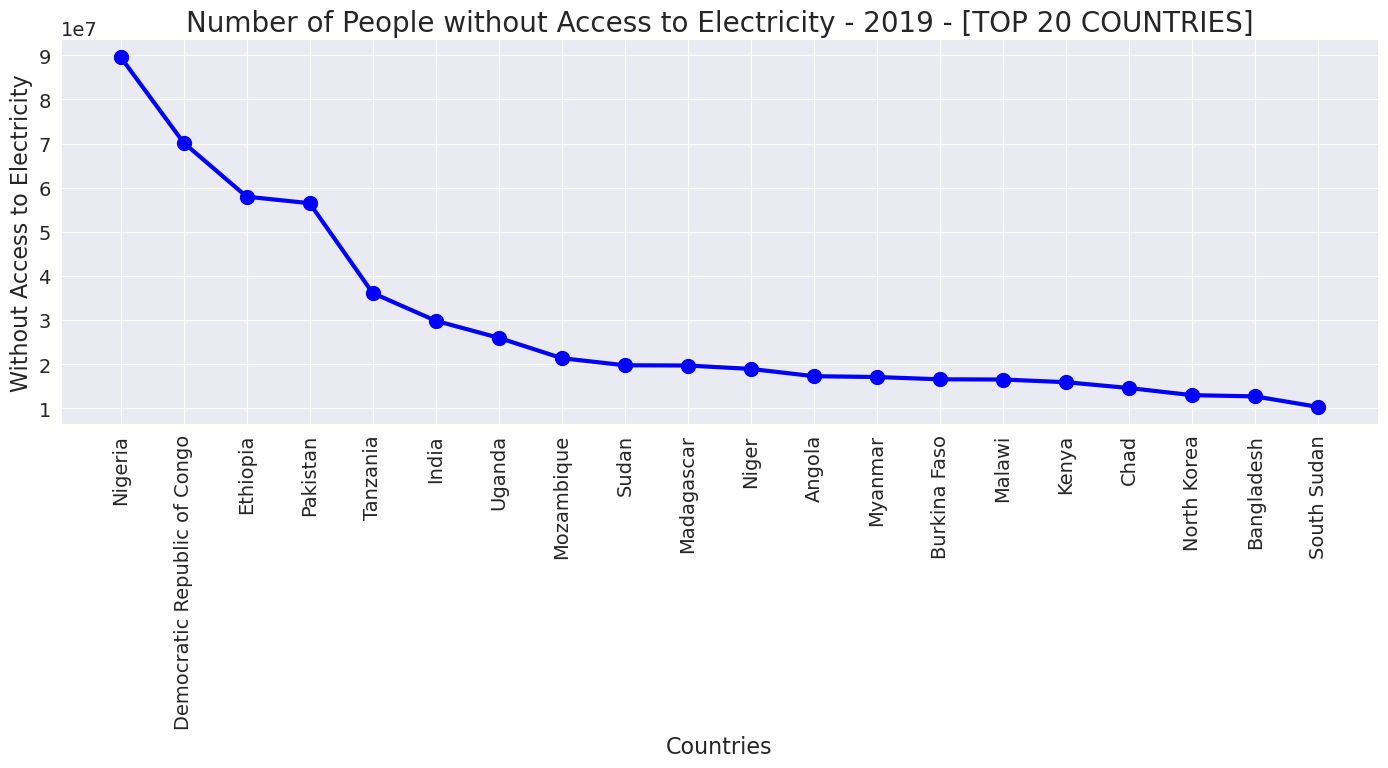

In [10]:
plt.plot(npwae['Entity'], npwae['Number of people without access to electricity'], 'o-b', lw=3, ms=10)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Without Access to Electricity', fontsize=16)
plt.xticks(rotation=90)
plt.title('Number of People without Access to Electricity - 2019 - [TOP 20 COUNTRIES]', fontsize=20)

plt.show();

In [11]:
npwae

,Entity,Year,Number of people without access to electricity
0,Nigeria,2019,89629766.94
1,Democratic Republic of Congo,2019,70213569.51
2,Ethiopia,2019,57976507.89
3,Pakistan,2019,56492448.86
4,Tanzania,2019,36137402.20
5,India,2019,29852337.38
6,Uganda,2019,25986247.57
7,Mozambique,2019,21372786.71
8,Sudan,2019,19768125.03
9,Madagascar,2019,19712625.05


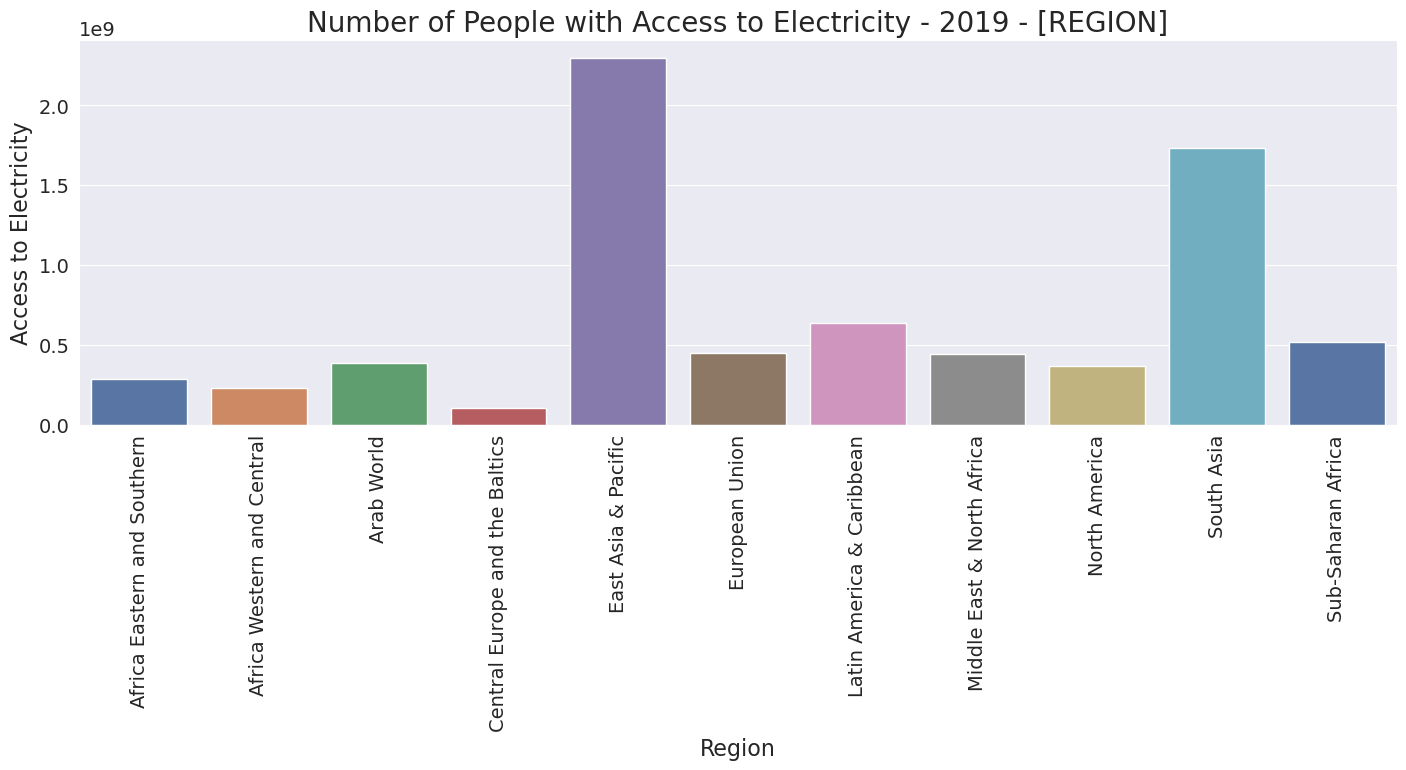

In [12]:
sns.barplot(x='Entity', y='Number of people with access to electricity', data=npaeRE, palette='deep')

plt.xlabel('Region', fontsize=16)
plt.ylabel('Access to Electricity', fontsize=16)
plt.xticks(rotation=90)
plt.title('Number of People with Access to Electricity - 2019 - [REGION]', fontsize=20)

plt.show();

In [13]:
npaeRE

,Entity,Year,Number of people with access to electricity
0,Africa Eastern and Southern,2019,2.880486e+08
1,Africa Western and Central,2019,2.294508e+08
2,Arab World,2019,3.829964e+08
3,Central Europe and the Baltics,2019,1.023985e+08
4,East Asia & Pacific,2019,2.296861e+09
5,European Union,2019,4.471965e+08
6,Latin America & Caribbean,2019,6.362449e+08
7,Middle East & North Africa,2019,4.440702e+08
8,North America,2019,3.659872e+08
9,South Asia,2019,1.732950e+09


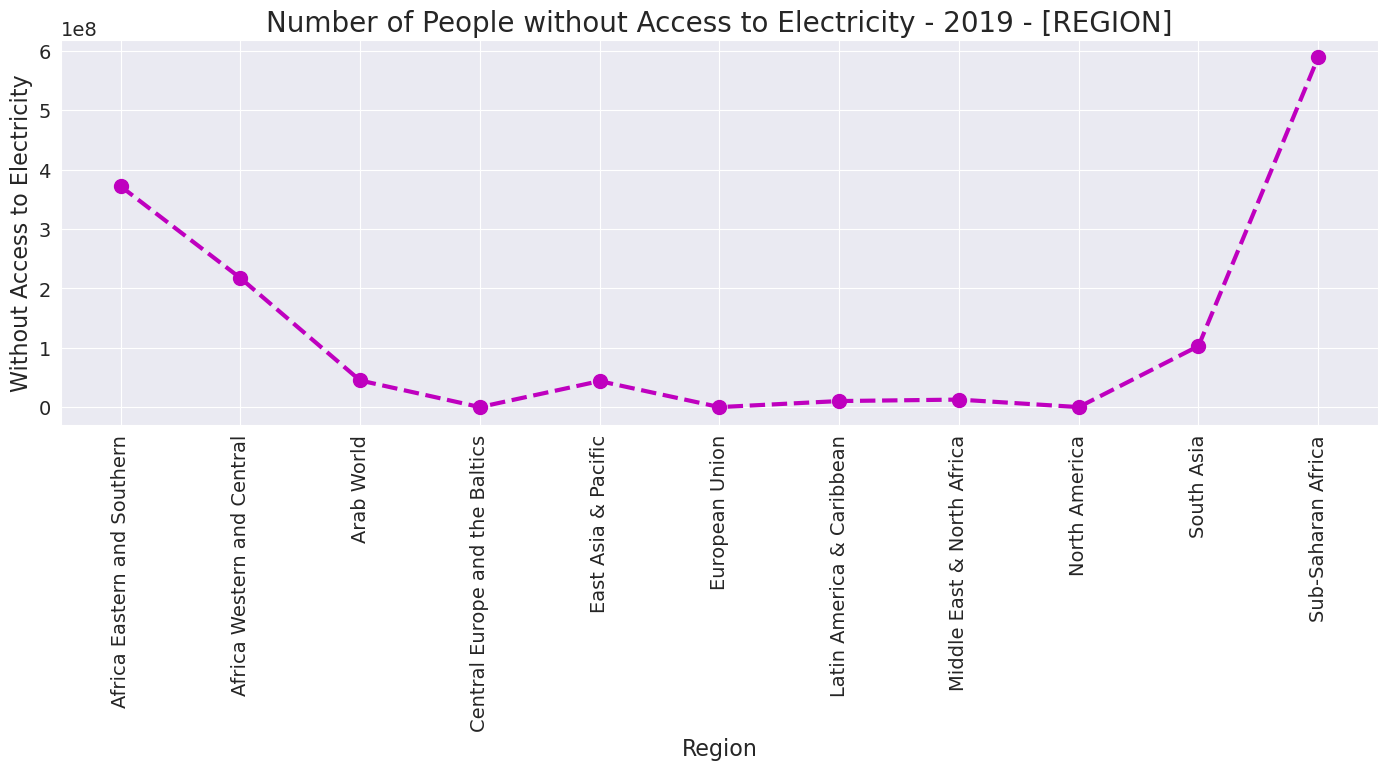

In [14]:
plt.plot(npwaeRE['Entity'], npwaeRE['Number of people without access to electricity'], 'o--m', lw=3, ms=10)

plt.xlabel('Region', fontsize=16)
plt.ylabel('Without Access to Electricity', fontsize=16)
plt.xticks(rotation=90)
plt.title('Number of People without Access to Electricity - 2019 - [REGION]', fontsize=20)

plt.show();

In [15]:
npwaeRE

,Entity,Year,Number of people without access to electricity
0,Africa Eastern and Southern,2019,3.719977e+08
1,Africa Western and Central,2019,2.174608e+08
2,Arab World,2019,4.487383e+07
3,Central Europe and the Baltics,2019,0.000000e+00
4,East Asia & Pacific,2019,4.381251e+07
5,European Union,2019,0.000000e+00
6,Latin America & Caribbean,2019,1.018584e+07
7,Middle East & North Africa,2019,1.263925e+07
8,North America,2019,0.000000e+00
9,South Asia,2019,1.028268e+08


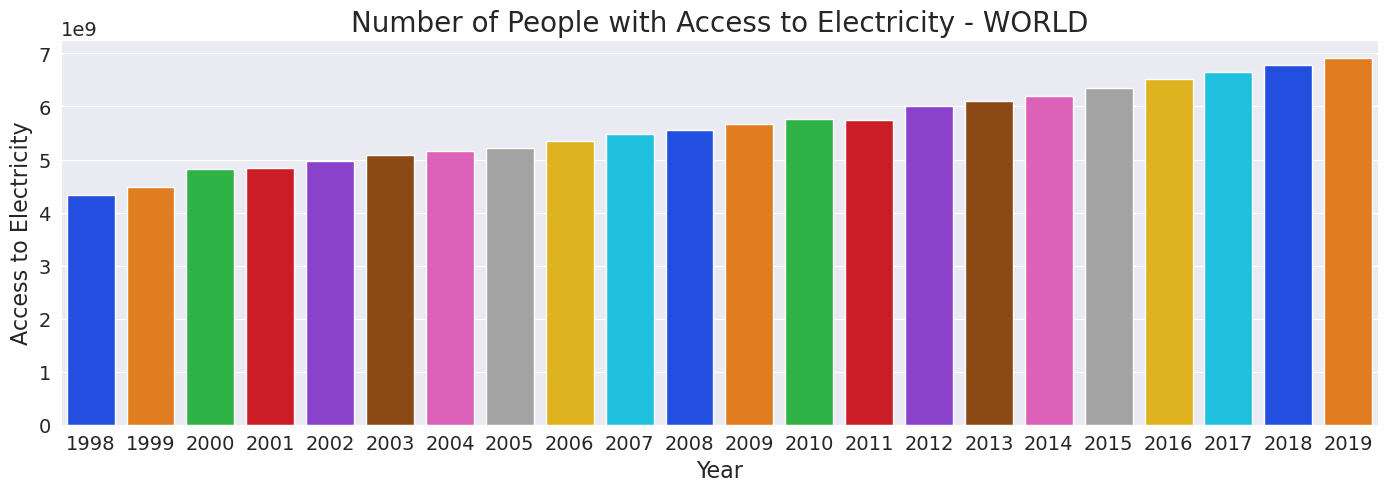

In [16]:
sns.barplot(x='Year', y='Number of people with access to electricity', data=npaeWD, palette='bright')

plt.xlabel('Year', fontsize=16)
plt.ylabel('Access to Electricity', fontsize=16)
plt.title('Number of People with Access to Electricity - WORLD', fontsize=20)

plt.show();

In [17]:
npaeWD

,Entity,Year,Number of people with access to electricity,Number of people without access to electricity
0,World,1998,4.326062e+09,1.627944e+09
1,World,1999,4.473759e+09,1.560733e+09
2,World,2000,4.814185e+09,1.300148e+09
3,World,2001,4.844793e+09,1.348879e+09
4,World,2002,4.980416e+09,1.292337e+09
5,World,2003,5.082063e+09,1.269820e+09
6,World,2004,5.155565e+09,1.275987e+09
7,World,2005,5.219912e+09,1.291837e+09
8,World,2006,5.356669e+09,1.236066e+09
9,World,2007,5.486509e+09,1.187694e+09


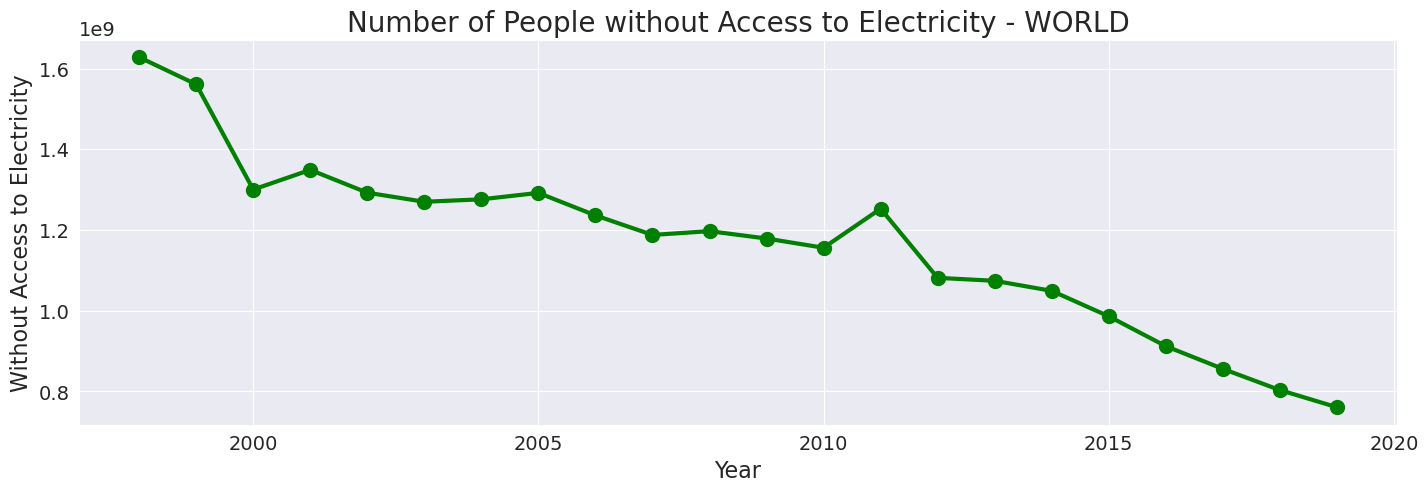

In [18]:
plt.plot(npaeWD['Year'], npaeWD['Number of people without access to electricity'], 'o-g', lw=3, ms=10)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Without Access to Electricity', fontsize=16)
plt.title('Number of People without Access to Electricity - WORLD', fontsize=20)

plt.show();

In [19]:
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/13153421"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

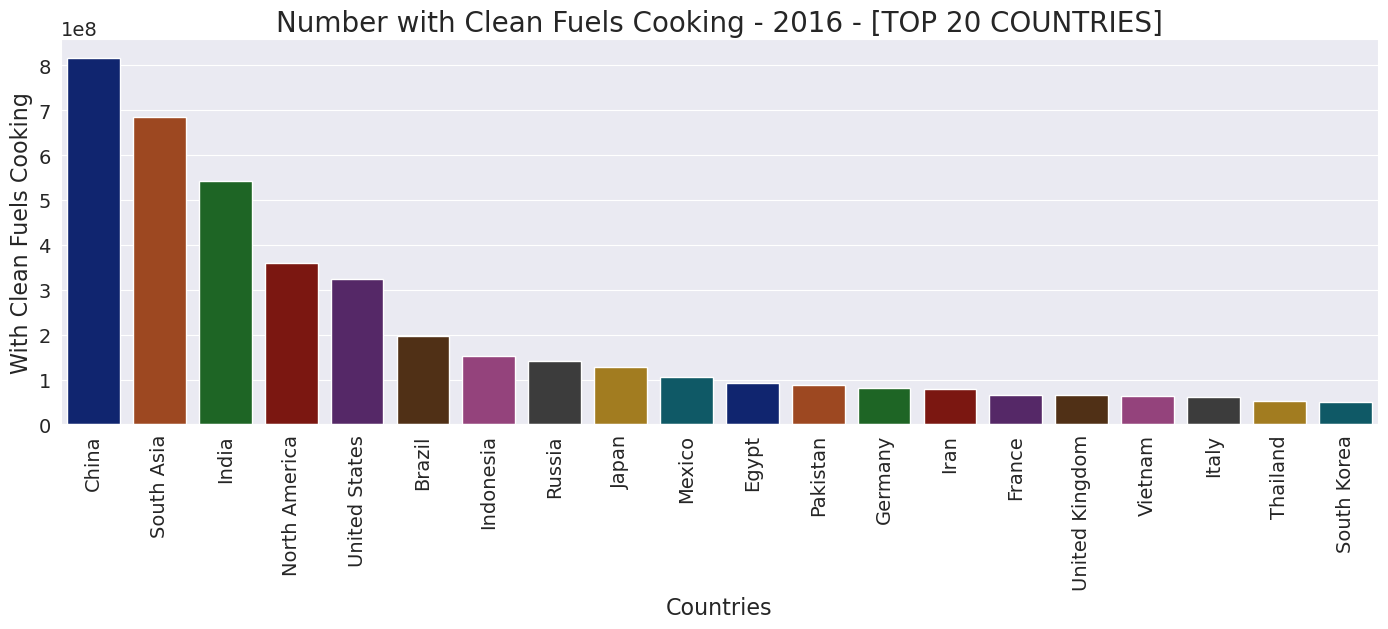

In [20]:
sns.barplot(x='Entity', y='number_with_clean_fuels_cooking', data=ncfc, palette='dark')

plt.xlabel('Countries', fontsize=16)
plt.ylabel('With Clean Fuels Cooking', fontsize=16)
plt.xticks(rotation=90)
plt.title('Number with Clean Fuels Cooking - 2016 - [TOP 20 COUNTRIES]', fontsize=20)

plt.show();

In [21]:
ncfc

,Entity,Year,number_with_clean_fuels_cooking
0,China,2016,8.169969e+08
1,South Asia,2016,6.852126e+08
2,India,2016,5.435819e+08
3,North America,2016,3.592458e+08
4,United States,2016,3.230718e+08
5,Brazil,2016,1.970713e+08
6,Indonesia,2016,1.526705e+08
7,Russia,2016,1.418164e+08
8,Japan,2016,1.269945e+08
9,Mexico,2016,1.052650e+08


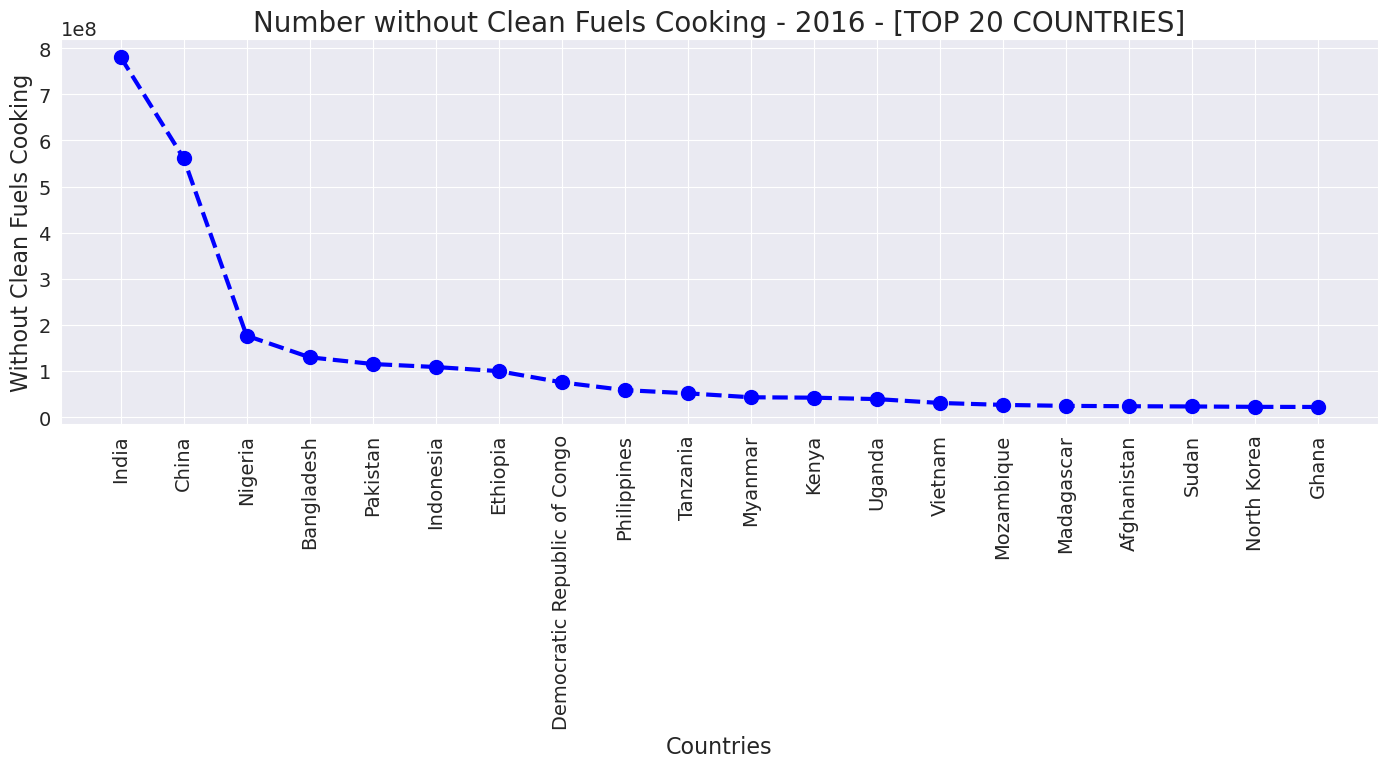

In [22]:
plt.plot(nwcfc['Entity'], nwcfc['number_without_clean_fuels_cooking'], 'o--b', lw=3, ms=10)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Without Clean Fuels Cooking', fontsize=16)
plt.xticks(rotation=90)
plt.title('Number without Clean Fuels Cooking - 2016 - [TOP 20 COUNTRIES]', fontsize=20)

plt.show();

In [23]:
nwcfc

,Entity,Year,number_without_clean_fuels_cooking
0,India,2016,7.809354e+08
1,China,2016,5.616681e+08
2,Nigeria,2016,1.768296e+08
3,Bangladesh,2016,1.299836e+08
4,Pakistan,2016,1.154183e+08
5,Indonesia,2016,1.088859e+08
6,Ethiopia,2016,9.996698e+07
7,Democratic Republic of Congo,2016,7.562181e+07
8,Philippines,2016,5.886031e+07
9,Tanzania,2016,5.190337e+07


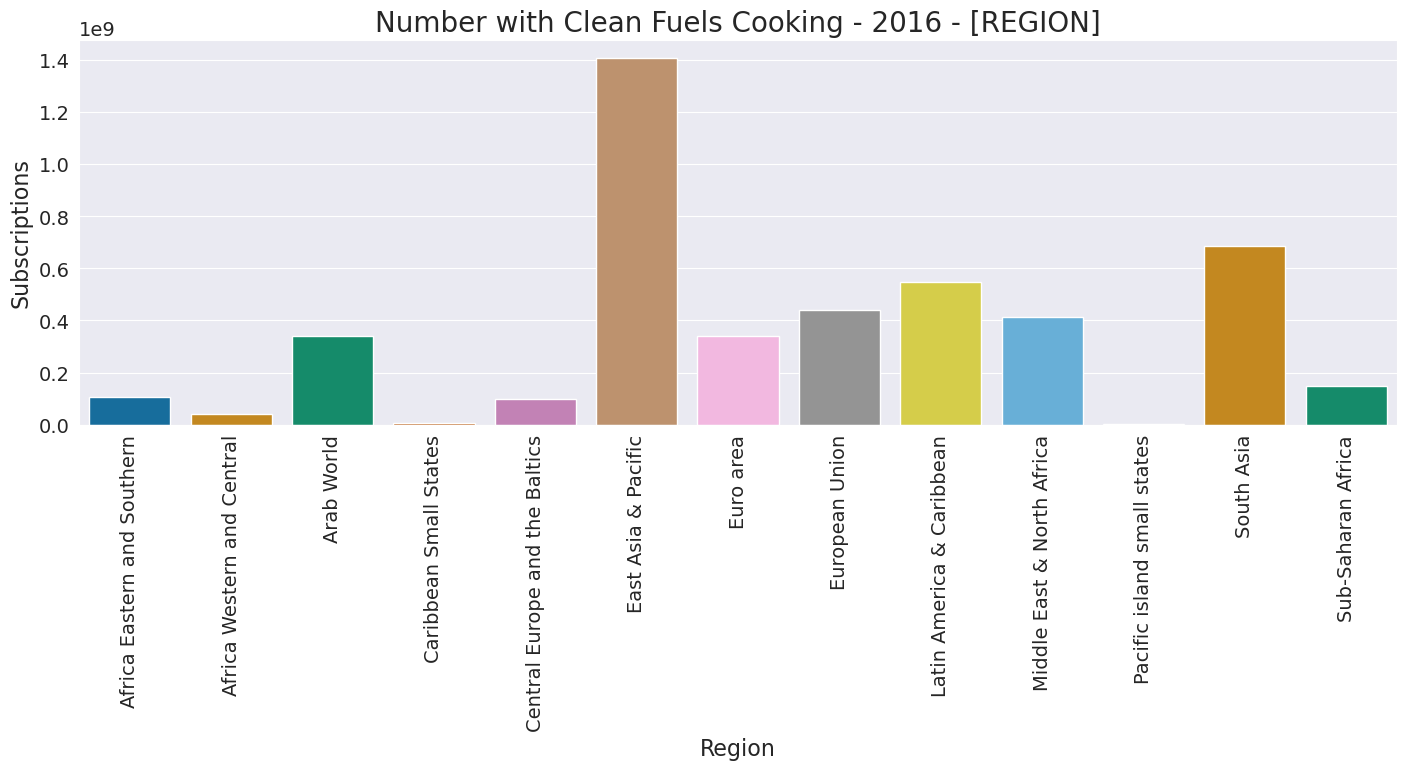

In [24]:
sns.barplot(x='Entity', y='number_with_clean_fuels_cooking', data=ncfcRE, palette='colorblind')

plt.xlabel('Region', fontsize=16)
plt.ylabel('Subscriptions', fontsize=16)
plt.xticks(rotation=90)
plt.title('Number with Clean Fuels Cooking - 2016 - [REGION]', fontsize=20)

plt.show();

In [25]:
ncfcRE

,Entity,Year,number_with_clean_fuels_cooking
0,Africa Eastern and Southern,2016,1.073865e+08
1,Africa Western and Central,2016,3.972667e+07
2,Arab World,2016,3.414596e+08
3,Caribbean Small States,2016,6.651236e+06
4,Central Europe and the Baltics,2016,9.834446e+07
5,East Asia & Pacific,2016,1.408050e+09
6,Euro area,2016,3.394156e+08
7,European Union,2016,4.402226e+08
8,Latin America & Caribbean,2016,5.468454e+08
9,Middle East & North Africa,2016,4.118663e+08


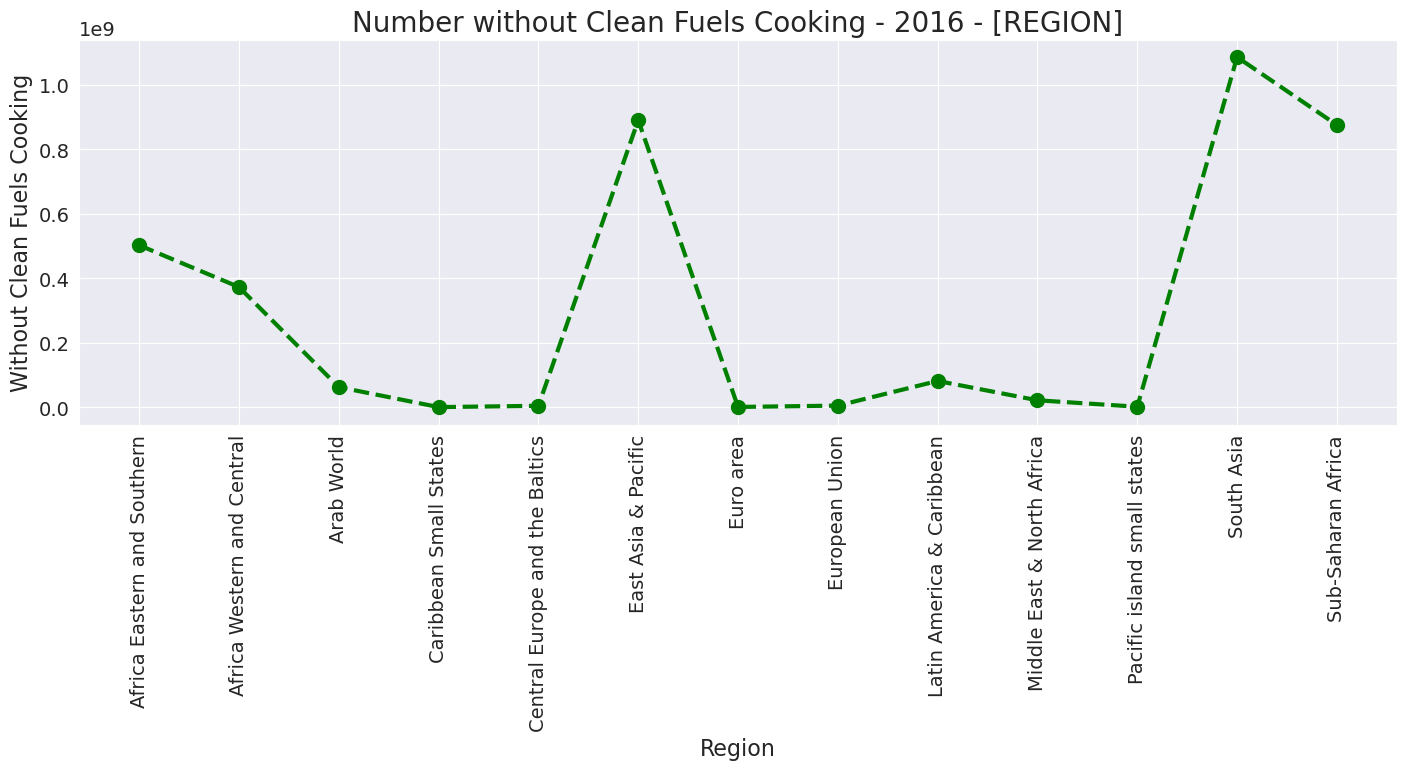

In [26]:
plt.plot(nwcfcRE['Entity'], nwcfcRE['number_without_clean_fuels_cooking'], 'o--g', lw=3, ms=10)

plt.xlabel('Region', fontsize=16)
plt.ylabel('Without Clean Fuels Cooking', fontsize=16)
plt.xticks(rotation=90)
plt.title('Number without Clean Fuels Cooking - 2016 - [REGION]', fontsize=20)

plt.show();

In [27]:
nwcfcRE

,Entity,Year,number_without_clean_fuels_cooking
0,Africa Eastern and Southern,2016,5.025925e+08
1,Africa Western and Central,2016,3.728246e+08
2,Arab World,2016,6.258328e+07
3,Caribbean Small States,2016,6.181490e+05
4,Central Europe and the Baltics,2016,4.649816e+06
5,East Asia & Pacific,2016,8.904510e+08
6,Euro area,2016,1.066175e+06
7,European Union,2016,5.265124e+06
8,Latin America & Caribbean,2016,8.164821e+07
9,Middle East & North Africa,2016,2.174976e+07


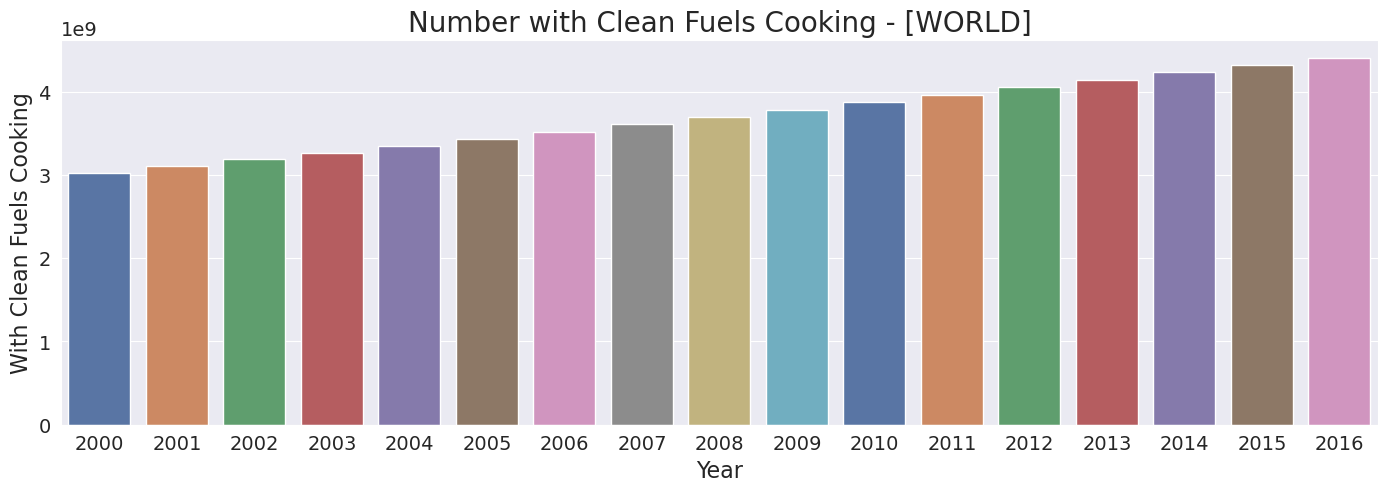

In [28]:
sns.barplot(x='Year', y='number_with_clean_fuels_cooking', data=nwcfcWD, palette='deep')

plt.xlabel('Year', fontsize=16)
plt.ylabel('With Clean Fuels Cooking', fontsize=16)
plt.title('Number with Clean Fuels Cooking - [WORLD]', fontsize=20)

plt.show();

In [29]:
nwcfcWD

,Entity,Year,number_with_clean_fuels_cooking,number_without_clean_fuels_cooking
0,World,2000,3.020563e+09,3.093770e+09
1,World,2001,3.109581e+09,3.084090e+09
2,World,2002,3.187461e+09,3.085292e+09
3,World,2003,3.265313e+09,3.086569e+09
4,World,2004,3.348087e+09,3.083464e+09
5,World,2005,3.429655e+09,3.082093e+09
6,World,2006,3.521480e+09,3.071255e+09
7,World,2007,3.608085e+09,3.066119e+09
8,World,2008,3.699654e+09,3.057366e+09
9,World,2009,3.783823e+09,3.055751e+09


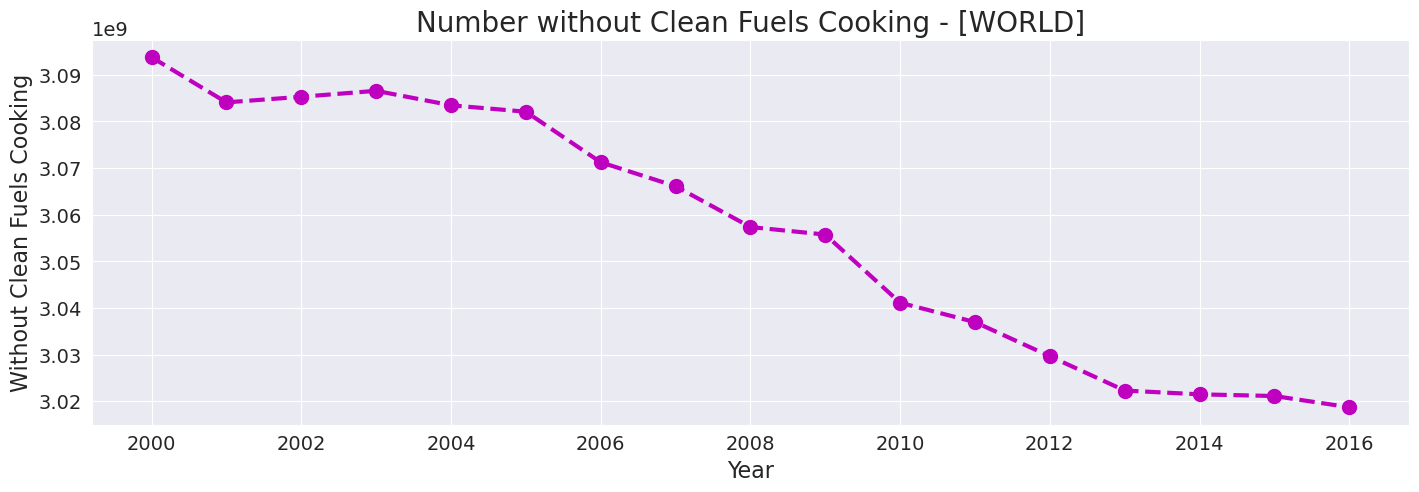

In [30]:
plt.plot(nwcfcWD['Year'], nwcfcWD['number_without_clean_fuels_cooking'], 'o--m', lw=3, ms=10)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Without Clean Fuels Cooking', fontsize=16)
plt.title('Number without Clean Fuels Cooking - [WORLD]', fontsize=20)

plt.show();

In [31]:
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/13155063"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

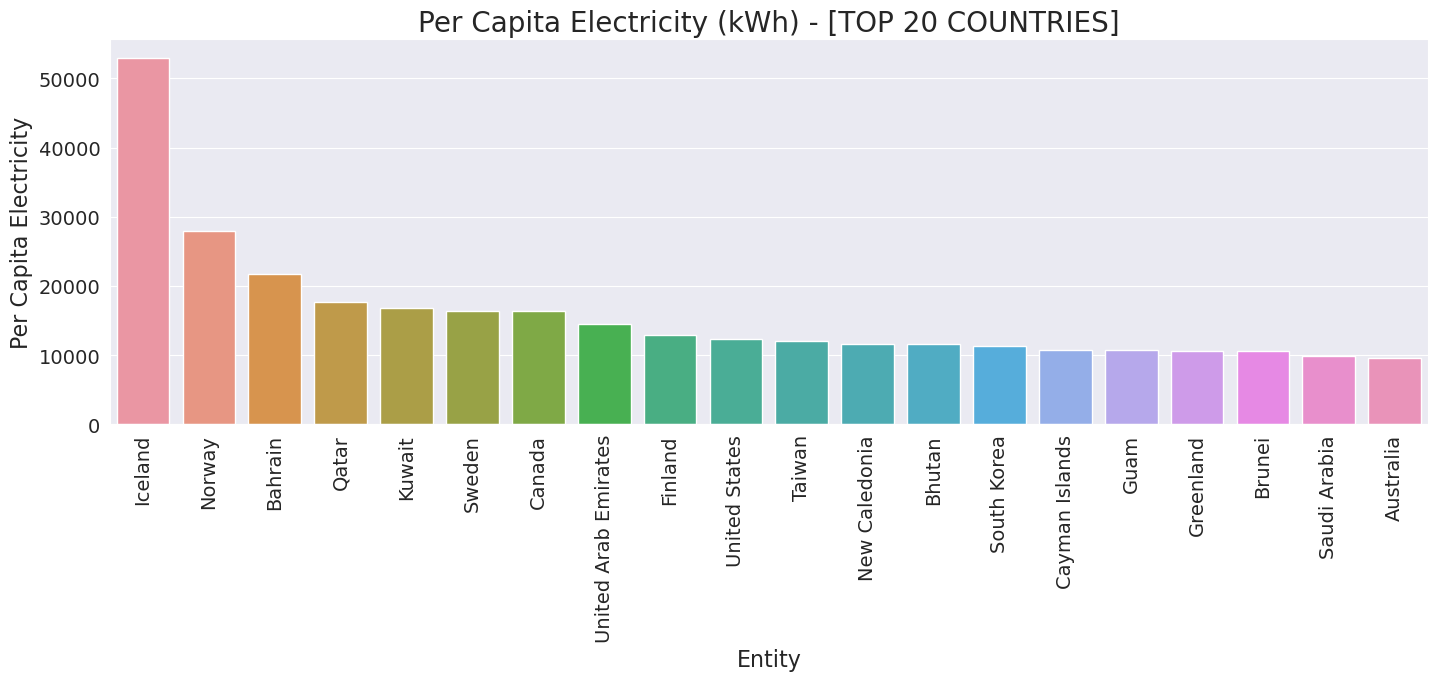

In [32]:
sns.barplot(x='Entity', y='Per capita electricity (kWh)', data=pce)

plt.xlabel('Entity', fontsize=16)
plt.ylabel('Per Capita Electricity', fontsize=16)
plt.xticks(rotation=90)
plt.title('Per Capita Electricity (kWh) - [TOP 20 COUNTRIES]', fontsize=20)

plt.show();

In [33]:
pce

,Entity,Year,Per capita electricity (kWh)
0,Iceland,2021,52980.2150
1,Norway,2021,27976.9400
2,Bahrain,2021,21704.8710
3,Qatar,2021,17669.5600
4,Kuwait,2021,16757.2100
5,Sweden,2021,16410.4750
6,Canada,2021,16405.4450
7,United Arab Emirates,2021,14482.4180
8,Finland,2021,12922.7295
9,United States,2021,12321.2150


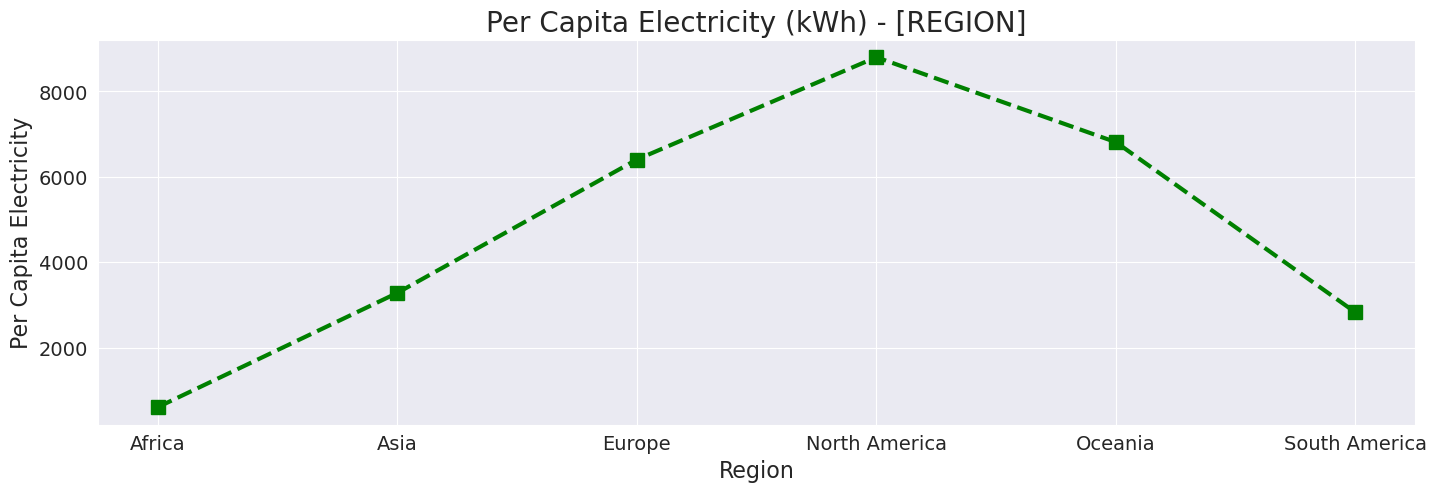

In [34]:
plt.plot(pceRE['Entity'], pceRE['Per capita electricity (kWh)'], 's--g', lw=3, ms=10)

plt.xlabel('Region', fontsize=16)
plt.ylabel('Per Capita Electricity', fontsize=16)
plt.title('Per Capita Electricity (kWh) - [REGION]', fontsize=20)

plt.show();

In [35]:
pceRE

,Entity,Year,Per capita electricity (kWh)
0,Africa,2021,602.25586
1,Asia,2021,3278.18040
2,Europe,2021,6402.65500
3,North America,2021,8800.49300
4,Oceania,2021,6811.55130
5,South America,2021,2824.63620


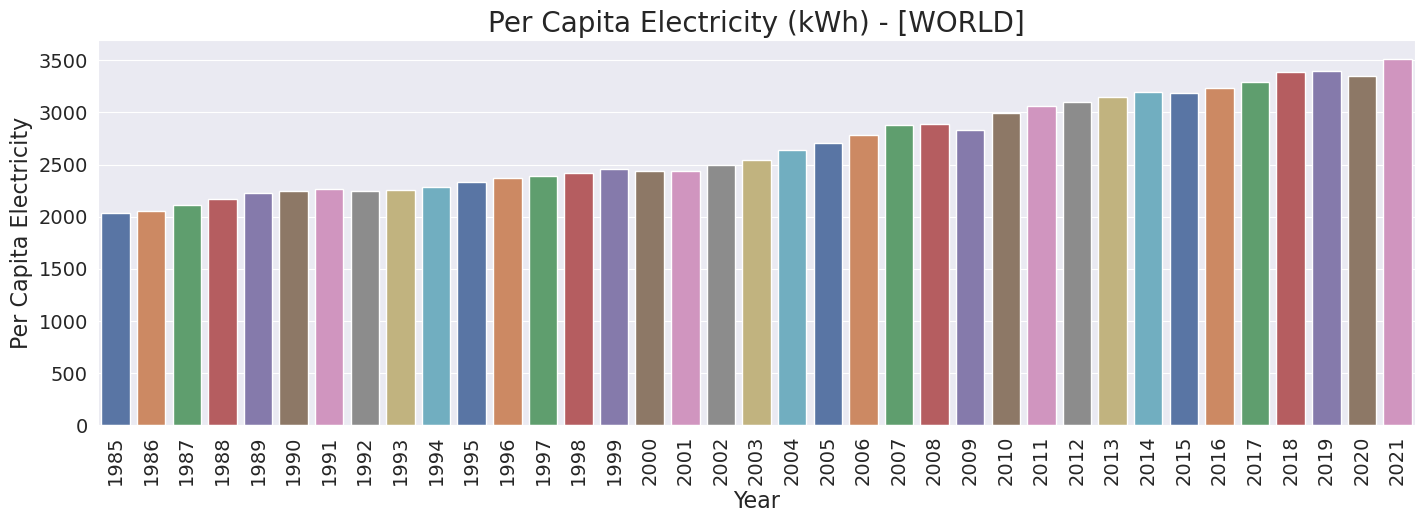

In [36]:
sns.barplot(x='Year', y='Per capita electricity (kWh)', data=pceWD, palette='deep')

plt.xlabel('Year', fontsize=16)
plt.ylabel('Per Capita Electricity', fontsize=16)
plt.xticks(rotation=90)
plt.title('Per Capita Electricity (kWh) - [WORLD]', fontsize=20)

plt.show();

In [37]:
pceWD

,Entity,Year,Per capita electricity (kWh)
0,World,1985,2032.8466
1,World,1986,2056.1420
2,World,1987,2116.2332
3,World,1988,2170.1711
4,World,1989,2231.5518
5,World,1990,2249.9412
6,World,1991,2260.8418
7,World,1992,2245.8772
8,World,1993,2258.9993
9,World,1994,2283.0618


In [38]:
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/13155545"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

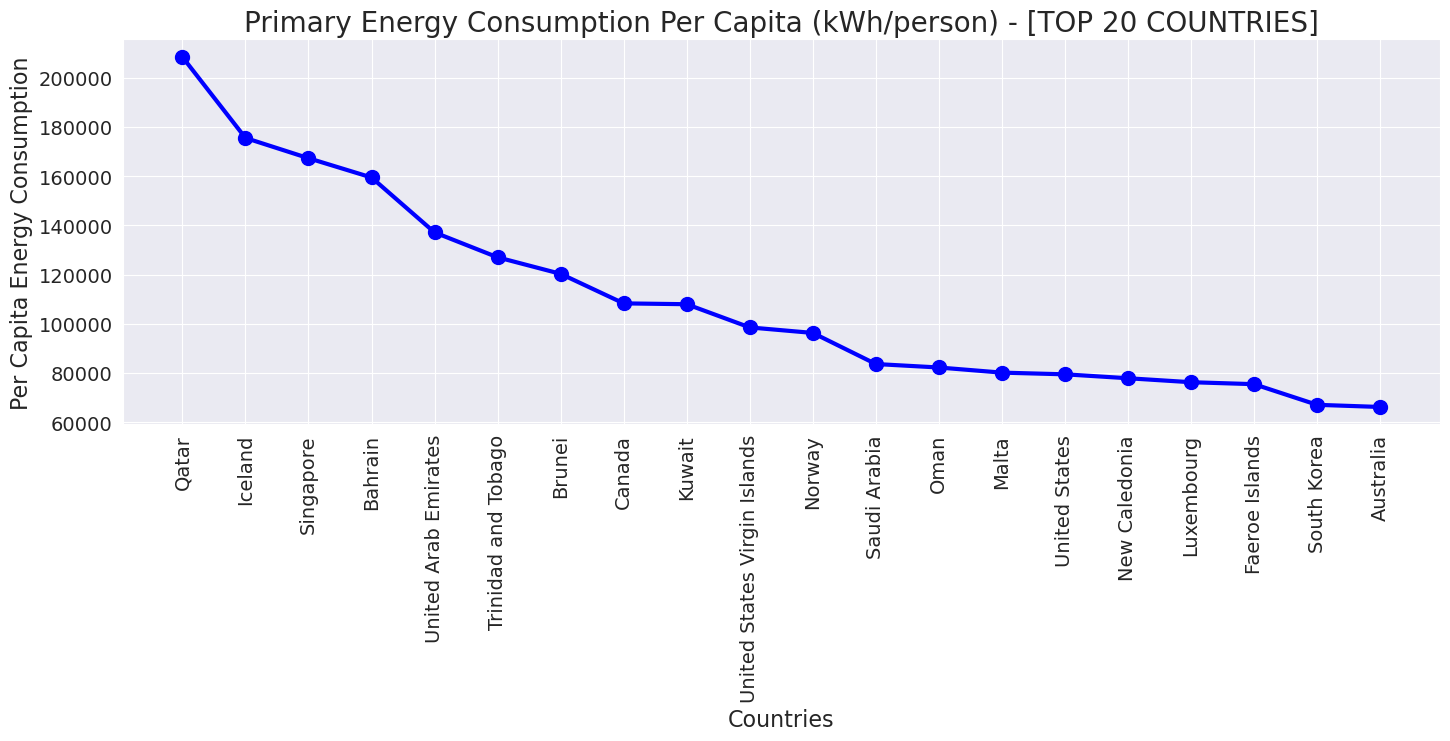

In [39]:
plt.plot(pecpc['Entity'], pecpc['Primary energy consumption per capita (kWh/person)'], 'o-b', lw=3, ms=10)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Per Capita Energy Consumption', fontsize=16)
plt.xticks(rotation=90)
plt.title('Primary Energy Consumption Per Capita (kWh/person) - [TOP 20 COUNTRIES]', fontsize=20)

plt.show();

In [40]:
pecpc

,Entity,Year,Primary energy consumption per capita (kWh/person)
0,Qatar,2019,208448.000
1,Iceland,2019,175527.750
2,Singapore,2019,167306.000
3,Bahrain,2019,159474.500
4,United Arab Emirates,2019,137143.800
5,Trinidad and Tobago,2019,127023.280
6,Brunei,2019,120314.980
7,Canada,2019,108308.130
8,Kuwait,2019,107970.180
9,United States Virgin Islands,2019,98535.740


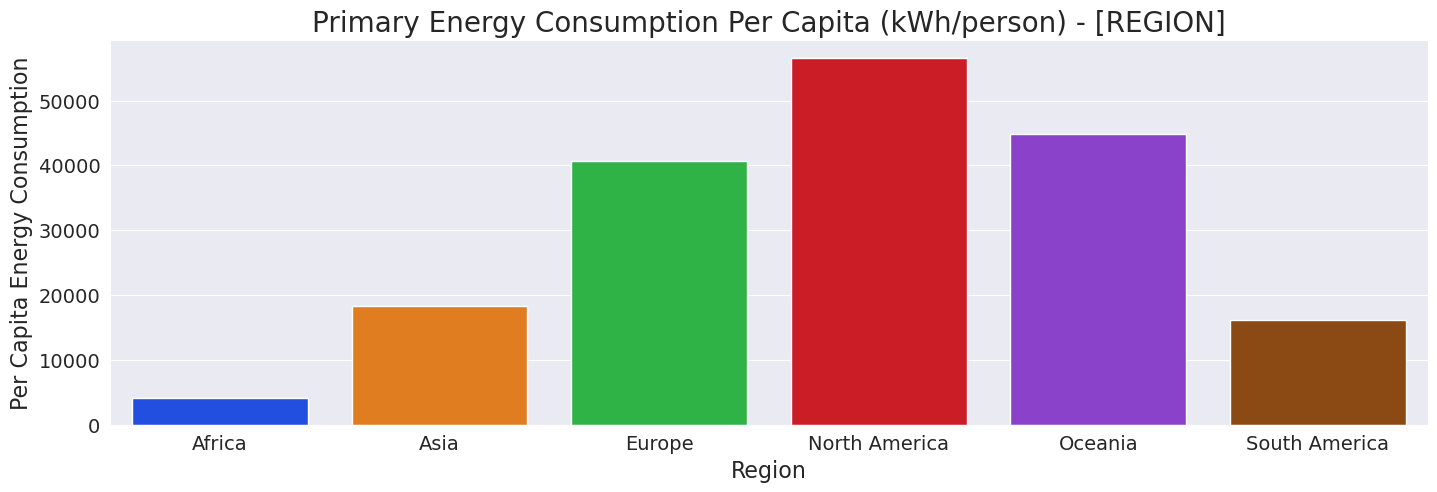

In [41]:
sns.barplot(x='Entity', y='Primary energy consumption per capita (kWh/person)', data=pecpcRE, palette='bright')

plt.xlabel('Region', fontsize=16)
plt.ylabel('Per Capita Energy Consumption', fontsize=16)
plt.title('Primary Energy Consumption Per Capita (kWh/person) - [REGION]', fontsize=20)

plt.show();

In [42]:
pecpcRE

,Entity,Year,Primary energy consumption per capita (kWh/person)
0,Africa,2019,4182.9233
1,Asia,2019,18281.4020
2,Europe,2019,40629.9400
3,North America,2019,56555.0800
4,Oceania,2019,44889.5270
5,South America,2019,16166.9740


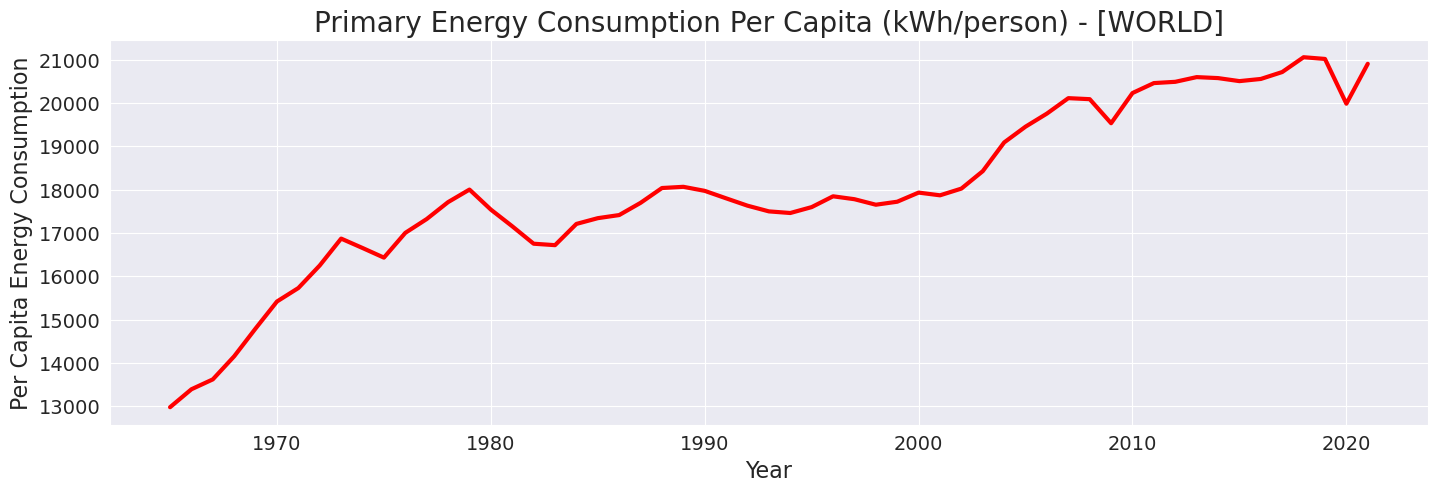

In [43]:
plt.plot(pecpcWD['Year'], pecpcWD['Primary energy consumption per capita (kWh/person)'], '-r', lw=3, ms=10)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Per Capita Energy Consumption', fontsize=16)
plt.title('Primary Energy Consumption Per Capita (kWh/person) - [WORLD]', fontsize=20)

plt.show();

In [44]:
pecpcWD

,Entity,Year,Primary energy consumption per capita (kWh/person)
0,World,1965,12975.564
1,World,1966,13389.972
2,World,1967,13618.113
3,World,1968,14151.465
4,World,1969,14792.827
5,World,1970,15415.745
6,World,1971,15726.903
7,World,1972,16247.762
8,World,1973,16867.516
9,World,1974,16650.602


# Concluding Remarks

In conclusion, the last few decades have seen significant progress in improving energy access and consumption around the world. The number of people with access to electricity has increased, and there has been a push towards cleaner and more sustainable energy sources. However, challenges still remain, especially in providing clean fuels for cooking and reducing energy consumption per capita.

By examining key indicators related to energy access and consumption, we can gain a better understanding of the progress made so far and the areas where further efforts are needed.

As we move forward, it is crucial that we continue to work towards providing universal access to clean and affordable energy while also reducing our environmental impact. Through ongoing efforts and innovation, we can create a more sustainable and equitable energy future for all.